#### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#### Loading the dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

<img src="dataset_images.jpg" />

In [2]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

#### Data Visualization

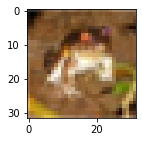

In [5]:
plt.figure(figsize = (10,2))
plt.imshow(X_train[0])

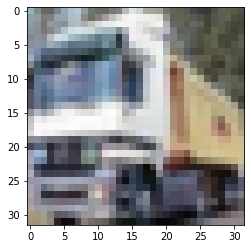

In [6]:
plt.imshow(X_train[1])

#### Define the classes

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

#### Data Preprocessing

##### Scale images

In [9]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

#### Initializing the ANN

In [11]:
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])


#### Compiling the ANN

In [12]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

#### Training the ANN on the Training set

In [13]:
history =  model.fit(X_train_scaled, y_train, batch_size = 32, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 120s 76ms/step - loss: 2.1765 - accuracy: 0.2767
Epoch 2/10
1563/1563 [==============================] - 117s 75ms/step - loss: 1.6793 - accuracy: 0.3996
Epoch 3/10
1563/1563 [==============================] - 122s 78ms/step - loss: 1.5905 - accuracy: 0.4316
Epoch 4/10
1563/1563 [==============================] - 126s 80ms/step - loss: 1.5327 - accuracy: 0.4499
Epoch 5/10
1563/1563 [==============================] - 120s 77ms/step - loss: 1.4878 - accuracy: 0.4665
Epoch 6/10
1563/1563 [==============================] - 118s 76ms/step - loss: 1.4503 - accuracy: 0.4803
Epoch 7/10
1563/1563 [==============================] - 118s 75ms/step - loss: 1.4271 - accuracy: 0.4887
Epoch 8/10
1563/1563 [==============================] - 118s 75ms/step - loss: 1.4121 - accuracy: 0.4953s - loss: 1.4121 - accura
Epoch 9/10
1563/1563 [==============================] - 120s 77ms/step - loss: 1.3815 - accuracy: 0.5058
Epoch 10/10
1563/1563 [=======

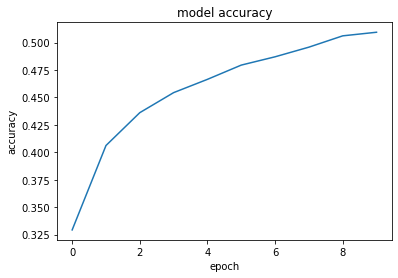

In [14]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

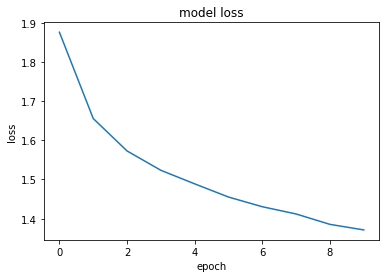

In [15]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#### Evaluate the model

In [16]:
model.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.4317 - accuracy: 0.4991


[1.4317125082015991, 0.499099999666214]

#### classification report

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report")
print(classification_report(y_test,y_pred_classes))

Classification Report
              precision    recall  f1-score   support

           0       0.48      0.63      0.55      1000
           1       0.67      0.56      0.61      1000
           2       0.43      0.30      0.35      1000
           3       0.35      0.35      0.35      1000
           4       0.45      0.39      0.42      1000
           5       0.43      0.38      0.40      1000
           6       0.51      0.54      0.53      1000
           7       0.54      0.58      0.56      1000
           8       0.59      0.64      0.61      1000
           9       0.52      0.62      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



#### Heatmap

Text(69.0, 0.5, 'Truth')

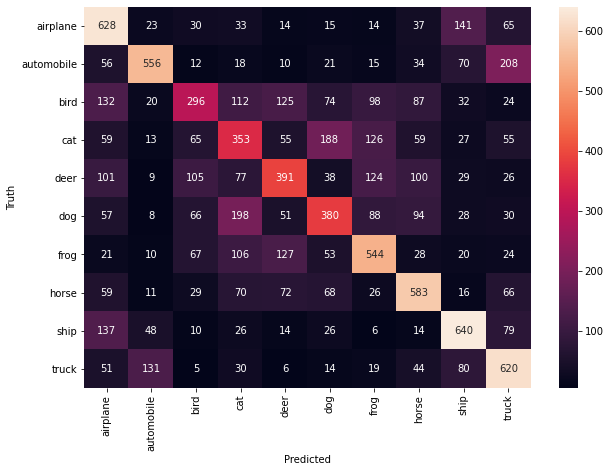

In [47]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_classes)
plt.figure(figsize = (10,7))
sn.heatmap(data=cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')